<a href="https://colab.research.google.com/github/xuandy05/Python-A.I./blob/master/Wine_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**GET THE DATASET**

In [0]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
                 names =["Cultivar","Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium","Total phenols", "Flavanoids","Nonflavanoids",
                        "Proanthocyannins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"])
y = df["Cultivar"]
df = df.drop("Cultivar", axis =1)
df.describe()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids,Proanthocyannins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**VISUALIZE THE DATA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2766b2fd0>,
      dtype=object)

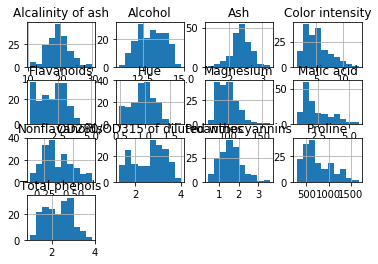

In [0]:
df.hist()


**PCA**

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df)
p = pca.transform(df)
df2 = pd.DataFrame(p, columns = ['Dimension 1', 'Dimension 2'])
df2

,Dimension 1,Dimension 2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
5,703.231192,-0.332159
6,542.971581,-13.518967
7,548.401860,11.449432
8,298.036863,-8.180158
9,298.049553,-7.101543


***GMM***

Text(0, 0.5, 'Dimension 2')

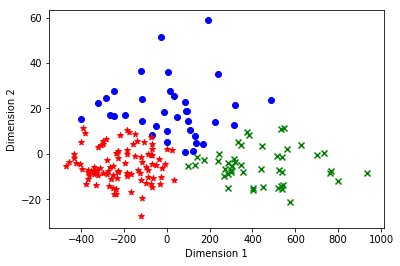

In [0]:
from sklearn import mixture
mixture = mixture.GaussianMixture(n_components = 3, covariance_type = 'diag').fit(df2)
g_pred = mixture.predict(df2)
g1 = df2[g_pred == 0]
g2 = df2[g_pred == 1]
g3 = df2[g_pred == 2]
plt.scatter(g1['Dimension 1'], g1['Dimension 2'], color = 'b', marker = 'o')
plt.scatter(g2['Dimension 1'], g2['Dimension 2'], color = 'r', marker = '*')
plt.scatter(g3['Dimension 1'], g3['Dimension 2'], color = 'g', marker = 'x')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

***CHECK ACCURACY***

In [0]:
mixture.bic(df2)

3940.05232502474